In [1]:
from HeadMoves import *
from Bandwidth import *
from DDP import *
from DDPOnline import *
from Bola3d import *
from Video import *
import matplotlib.pyplot as plt




In [2]:
def calc_reward(solution, buffer, download_time, delta,  probs, video, gamma):
    ddp_n = 0
    for m in solution:
        if m > 0:
            ddp_n += 1
    y = max(download_time - buffer, 0)
    buffer = max(buffer - download_time, 0) + ddp_n * video.delta
    expected_vals_dp = 0
    for i in range(D):
        expected_vals_dp += probs[i] * video.values[solution[i]]
    r0 = gamma * (delta) + expected_vals_dp
    if ddp_n > 0:
        return r0, buffer
    else:
        return 0, buffer




In [5]:
print("Calculating optimal offline")
# ddp.train(headMovements.get_all_probs())
# optimal_offline  = ddp.get_optimal_reward()
# print("Offline: ", optimal_offline)



Calculating optimal offline


In [5]:

bola_performance = []
ddpO_performance = []
bola_solutions = []
ddp_solutions = []
max_bands = np.arange(5, 10, 0.1)

for max_band in max_bands:
    time_bola = 0
    buffer_bola = 0
    reward_bola = 0

    time_dp = 0
    buffer_dp = 0
    reward_dp = 0
    bandwidth = Bandwidth(min_band, max_band, delta=t_0 / 1000, error_rate=bandwidth_error)
    bola3d = Bola3d(video, gamma, v_coeff)
    ddp_online = DDPOnline(video, buffer_size, bandwidth, gamma, t_0)
    print(max_band)
    n = 0
    while True:
        if n >= N:
            break
        print("n: ", n)
        probs = headMovements.get_probs(n)
        print("probs: ", probs)
        print("time: ", time_dp)
        #print("getting DP action")
        ddp_action = ddp_online.get_action(probs, time_dp, buffer_dp, reward_dp)
        print("n: " ,n ,"\tDDP-On action: ", ddp_action)
        if np.sum(ddp_action) > 0:
            download_time_dp = bandwidth.download_time(ddp_action, time_dp, video)
            n += 1
        else:
            download_time_dp = wait_time

        time_dp += download_time_dp
        reward_dp, buffer_dp = calc_reward(ddp_action, buffer_dp, download_time_dp, delta, probs, video, gamma)
        ddp_solutions.append(ddp_action)
    n = 0
    while True:
        if n >= N:
            break
        print(n)
        probs = headMovements.get_probs(n)
        print("probs: ", probs)
        # print("getting bola action")
        bola_action = bola3d.get_action(probs)
        print("n: " ,n ,"\tBola action: ", bola_action)
        bola_solutions.append(bola_action)
        # print("getting DP action")

        if np.sum(bola_action) > 0:
            download_time_bola = bandwidth.download_time(bola_action, time_bola, video)
            bola3d.take_action(bola_action, n, time_bola)
            n += 1
        else:
            download_time_bola = wait_time
            bola3d.take_action(bola_action, n, time_bola)
        time_bola += download_time_bola

        r_bola, buffer_bola = calc_reward(bola_action, buffer_bola, download_time_bola, delta, probs, video, gamma)
        reward_bola += r_bola

    bola_performance.append(reward_bola/ time_bola)
    ddpO_performance.append(reward_dp/ time_dp)
    print("Bola: r = {0}, time={1}, b={2}, r_0={3}".format(reward_bola/ time_bola,time_bola, buffer_bola, reward_bola))
    print("DPP: r = {0}, time={1}, b={2}, r_0={3}".format(reward_dp/ time_dp,time_dp, buffer_dp, reward_dp))
    break

# print("Bola: r = {0}, time={1}, b={2}, r_0={3}".format(reward_bola/ time_bola,time_bola, buffer_bola, reward_bola))
# print("DPP: r = {0}, time={1}, b={2}, r_0={3}".format(reward_dp/ time_dp,time_dp, buffer_dp, reward_dp))


# plt.plot(max_bands, bola_performance, label="Bola360")
# plt.plot(max_bands, ddpO_performance, label="DDP-Online")
# plt.legend()
# plt.xlabel("Bandwidth's average")
# plt.title("Objective values of Bola360 vs DDP-Online")
# plt.savefig("bandwidth_change.png", dpi=600)



5.0
n:  0
probs:  [0.16734907 0.29606641 0.26020076 0.27638376]
time:  0
n:  0 	DDP-On action:  [2, 2, 2, 2]
n:  1
probs:  [0.30859355 0.31842557 0.16481468 0.20816619]
time:  31.372999999972233
n:  1 	DDP-On action:  [2, 2, 2, 2]
n:  2
probs:  [0.0318744  0.23150265 0.33419056 0.4024324 ]
time:  62.746000000117576
n:  2 	DDP-On action:  [2, 2, 2, 2]
n:  3
probs:  [0.27768018 0.29837777 0.13507477 0.28886728]
time:  94.11900000026738
n:  3 	DDP-On action:  [2, 2, 2, 2]
n:  4
probs:  [0.08877585 0.30328261 0.27769369 0.33024784]
time:  125.49200000041718
n:  4 	DDP-On action:  [2, 2, 2, 2]
n:  5
probs:  [0.34036706 0.3985077  0.03175357 0.22937167]
time:  156.86499999974657
n:  5 	DDP-On action:  [2, 2, 2, 2]
n:  6
probs:  [0.35271761 0.42030315 0.16383357 0.06314567]
time:  188.2379999990047
n:  6 	DDP-On action:  [2, 2, 2, 2]
n:  7
probs:  [0.19772499 0.28310988 0.09907914 0.42008598]
time:  219.61099999826283
n:  7 	DDP-On action:  [2, 2, 2, 2]
n:  8
probs:  [0.18462402 0.18467823 0.

In [6]:
print("Bola: r = {0}, time={1}, b={2}, r_0={3}".format(reward_bola/ time_bola,time_bola, buffer_bola, reward_bola))
print("DPP: r = {0}, time={1}, b={2}, r_0={3}".format(reward_dp/ time_dp,time_dp, buffer_dp, reward_dp))

Bola: r = 0.1675201007614917, time=89.44000000021764, b=5, r_0=14.982997812144276
DPP: r = 0.04781181270605962, time=627.4599999886185, b=20, r_0=30.0


In [7]:
print(ddp_solutions)

[[2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2]]


In [8]:
print(bola_solutions)

[[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 1]]


In [9]:
print(np.average(ddp_solutions))

2.0


In [10]:
print(np.average(bola_solutions))

0.11904761904761904


In [11]:
number_of_downloaded_tiles_ddp = 0
for v in ddp_solutions:
    number_of_downloaded_tiles_ddp += np.sum(v)
print(number_of_downloaded_tiles_ddp)

160


In [12]:
number_of_downloaded_tiles_bola = 0
for v in bola_solutions:
    if np.sum(v) > 0:
        number_of_downloaded_tiles_bola += np.sum(v)
print(number_of_downloaded_tiles_bola)

20


In [61]:

# v = S

N = 20
D = 4
M = 3
buffer_size = 5
delta = 5
gamma = 2
t_0 = delta / 10
wait_time = t_0
bandwidth_error = 0.10
sizes = np.array([i for i in range(M)]) * 10
v_coeff = 1
values = np.array([i for i in range(M)]) * 10

min_band = 0.1
max_band = 10

video = Video(N, delta, D, values, sizes, buffer_size)
bandwidth = Bandwidth(min_band, max_band, delta=t_0 / 1000, error_rate=bandwidth_error)
headMovements = HeadMoves(N, D)

# bola3d = Bola3d(video, gamma, v_coeff)
# ddp = DDP(video,buffer_size, bandwidth, gamma, t_0)
# ddp_online = DDPOnline(video,buffer_size, bandwidth, gamma, t_0)



In [80]:

# v = 2S
ratio = 0.5
N = 40
D = 8
M = 3
buffer_size = 5
delta = 5
gamma = 2
t_0 = delta / 10
wait_time = t_0
bandwidth_error = 0.10
sizes = np.array([i for i in range(M)]) * 10 * ratio
v_coeff = 1
values = np.array([i for i in range(M)]) * 10

min_band = 0.1
max_band = 10

video = Video(N, delta, D, values, sizes, buffer_size)
bandwidth = Bandwidth(min_band, max_band, delta=t_0 / 1000, error_rate=bandwidth_error)
headMovements = HeadMoves(N, D)

# bola3d = Bola3d(video, gamma, v_coeff)
# ddp = DDP(video,buffer_size, bandwidth, gamma, t_0)
# ddp_online = DDPOnline(video,buffer_size, bandwidth, gamma, t_0)



In [6]:
headMovements.all_probs

[[0.2, 0, 0.2, 0, 0.2, 0.2, 0.2, 0],
 [0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0.2],
 [0, 0.25, 0.25, 0, 0.25, 0, 0.25, 0],
 [0, 0, 0.25, 0.25, 0.25, 0.25, 0, 0],
 [0.25, 0.25, 0, 0, 0.25, 0, 0.25, 0],
 [0, 0, 0, 0.25, 0.25, 0, 0.25, 0.25],
 [0, 0, 0.3333333333333333, 0, 0, 0.3333333333333333, 0, 0.3333333333333333],
 [0.25, 0, 0, 0.25, 0, 0.25, 0.25, 0],
 [0.25, 0, 0.25, 0, 0.25, 0, 0.25, 0],
 [0, 0.3333333333333333, 0.3333333333333333, 0, 0, 0.3333333333333333, 0, 0],
 [0,
  0.16666666666666666,
  0,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666],
 [0, 0, 0.25, 0, 0.25, 0.25, 0, 0.25],
 [0.2, 0.2, 0, 0.2, 0.2, 0, 0.2, 0],
 [0, 0, 0, 0.25, 0.25, 0.25, 0.25, 0],
 [0, 0.25, 0.25, 0, 0, 0.25, 0, 0.25],
 [0, 0.2, 0.2, 0, 0.2, 0.2, 0.2, 0],
 [0, 0.3333333333333333, 0, 0, 0.3333333333333333, 0.3333333333333333, 0, 0],
 [0.5, 0, 0, 0, 0, 0, 0, 0.5],
 [0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0.2],
 [0.16666666666666666,
  0,
  0.16666666666666666,

In [32]:

ratio = 2
N = 40
D = 4
M = 4
buffer_size = 6
delta = 5
gamma = 4
t_0 = delta / 10
wait_time = t_0

min_band = 0.1
max_band = 10


bandwidth_error = 0.10
sizes = np.array([i for i in range(M)]) * delta * 5
v_coeff = 1
values = np.array([i for i in range(M)]) * delta * 1/ 2
for i in range(len(values)):
    values[i] = np.power(values[i], 2)



video = Video(N, delta, D, values, sizes, buffer_size)
bandwidth = Bandwidth(min_band, max_band, delta=t_0 / 100, error_rate=bandwidth_error)
headMovements = HeadMoves(N, D)

# bola3d = Bola3d(video, gamma, v_coeff)
# ddp = DDP(video,buffer_size, bandwidth, gamma, t_0)
# ddp_online = DDPOnline(video,buffer_size, bandwidth, gamma, t_0)



In [33]:
sizes

array([ 0, 25, 50, 75])

In [34]:
values

array([ 0.  ,  6.25, 25.  , 56.25])

In [35]:

bola_performance = []
ddpO_performance = []
bola_solutions = {}
ddp_solutions = {}
max_bands = np.arange(1, 20, 2)
times_bola = []
times_ddp = []
buffer_levels_bola = {}
buffer_levels_ddp = {}
time_levels_bola = {}
time_levels_ddp = {}
for max_band in max_bands:
    time_bola = 0
    buffer_bola = 0
    reward_bola = 0
    bola_solutions[max_band] = []
    ddp_solutions[max_band] = []
    buffer_levels_bola[max_band] = []
    buffer_levels_ddp[max_band] = []
    time_levels_bola[max_band] = []
    time_levels_ddp[max_band] = []

    time_dp = 0
    buffer_dp = 0
    reward_dp = 0
    bandwidth = Bandwidth(min_band, max_band, delta=t_0 / 100, error_rate=bandwidth_error)
    bola3d = Bola3d(video, gamma, v_coeff)
    ddp_online = DDPOnline(video, buffer_size, bandwidth, gamma, t_0)
    print(max_band)
    n = 0
    while True:
        if n >= N:
            break
        time_levels_ddp[max_band].append(time_dp)
        buffer_levels_ddp[max_band].append(buffer_dp)
        print("ddP: n: ", n)
        probs = headMovements.get_probs(n)
#         print("probs: ", probs)
#         print("time: ", time_dp)
        #print("getting DP action")
        ddp_action = ddp_online.get_action(probs, time_dp, buffer_dp, reward_dp)
#         print("n: " ,n ,"\tDDP-On action: ", ddp_action)
        if np.sum(ddp_action) > 0:
            download_time_dp = bandwidth.download_time(ddp_action, time_dp, video)
            n+= 1
        else:
            download_time_dp = wait_time
        time_dp += download_time_dp
        r_dp, buffer_dp = calc_reward(ddp_action, buffer_dp, download_time_dp, delta, probs, video, gamma)
        ddp_solutions[max_band].append(ddp_action)
        reward_dp =+ r_dp
    times_ddp.append(time_dp)
    n = 0
    while True:
        if n >= N:
            break
        time_levels_bola[max_band].append(time_bola)
        buffer_levels_bola[max_band].append(buffer_bola)
        print("Bola n: ", n)
        probs = headMovements.get_probs(n)

        # print("getting bola action")
        bola_action = bola3d.get_action(probs)
        bola_solutions[max_band].append(bola_action)
        # print("getting DP action")

        if np.sum(bola_action) > 0:
            download_time_bola = bandwidth.download_time(bola_action, time_bola, video)
            bola3d.take_action(bola_action, n, time_bola)
            n += 1
        else:
            download_time_bola = wait_time
            bola3d.take_action(bola_action, n, time_bola)
        time_bola += download_time_bola

        reward_bola, buffer_bola = calc_reward(bola_action, buffer_bola, download_time_bola, delta, probs, video, gamma)

    bola_performance.append(reward_bola/ time_bola)
    ddpO_performance.append(reward_dp/ time_dp)
    times_bola.append(time_bola)

# print("Bola: r = {0}, time={1}, b={2}, r_0={3}".format(reward_bola/ time_bola,time_bola, buffer_bola, reward_bola))
# print("DPP: r = {0}, time={1}, b={2}, r_0={3}".format(reward_dp/ time_dp,time_dp, buffer_dp, reward_dp))


# plt.plot(max_bands, bola_performance, label="Bola360")
# plt.plot(max_bands, ddpO_performance, label="DDP-Online")
# plt.legend()
# plt.xlabel("Bandwidth's average")
# plt.title("Objective values of Bola360 vs DDP-Online")
# plt.savefig("bandwidth_change.png", dpi=600)



1
ddP: n:  0
ddP: n:  1
ddP: n:  2
ddP: n:  3
ddP: n:  4
ddP: n:  5
ddP: n:  6
ddP: n:  7
ddP: n:  8
ddP: n:  9
ddP: n:  10
ddP: n:  11
ddP: n:  12
ddP: n:  13
ddP: n:  14
ddP: n:  15
ddP: n:  16
ddP: n:  17
ddP: n:  18
ddP: n:  19
ddP: n:  20
ddP: n:  21
ddP: n:  22
ddP: n:  23
ddP: n:  24
ddP: n:  25
ddP: n:  26
ddP: n:  27
ddP: n:  28
ddP: n:  29
ddP: n:  30
ddP: n:  31
ddP: n:  32
ddP: n:  33
ddP: n:  34
ddP: n:  35
ddP: n:  36
ddP: n:  37
ddP: n:  38
ddP: n:  39
Bola n:  0
Bola n:  1
Bola n:  2
Bola n:  3
Bola n:  4
Bola n:  5
Bola n:  6
Bola n:  7
Bola n:  8
Bola n:  9
Bola n:  10
Bola n:  11
Bola n:  12
Bola n:  13
Bola n:  14
Bola n:  15
Bola n:  16
Bola n:  17
Bola n:  18
Bola n:  19
Bola n:  20
Bola n:  21
Bola n:  22
Bola n:  23
Bola n:  24
Bola n:  25
Bola n:  26
Bola n:  27
Bola n:  28
Bola n:  29
Bola n:  30
Bola n:  31
Bola n:  32
Bola n:  33
Bola n:  34
Bola n:  35
Bola n:  36
Bola n:  37
Bola n:  38
Bola n:  39
3
ddP: n:  0
ddP: n:  1
ddP: n:  2
ddP: n:  3
ddP: n:  4
d

Bola n:  21
Bola n:  22
Bola n:  23
Bola n:  24
Bola n:  25
Bola n:  26
Bola n:  27
Bola n:  28
Bola n:  29
Bola n:  30
Bola n:  31
Bola n:  32
Bola n:  33
Bola n:  34
Bola n:  35
Bola n:  36
Bola n:  37
Bola n:  38
Bola n:  39
19
ddP: n:  0
ddP: n:  1
ddP: n:  2
ddP: n:  3
ddP: n:  4
ddP: n:  5
ddP: n:  6
ddP: n:  7
ddP: n:  8
ddP: n:  9
ddP: n:  10
ddP: n:  11
ddP: n:  12
ddP: n:  13
ddP: n:  14
ddP: n:  15
ddP: n:  16
ddP: n:  17
ddP: n:  18
ddP: n:  19
ddP: n:  20
ddP: n:  21
ddP: n:  22
ddP: n:  23
ddP: n:  24
ddP: n:  25
ddP: n:  26
ddP: n:  27
ddP: n:  28
ddP: n:  29
ddP: n:  30
ddP: n:  31
ddP: n:  32
ddP: n:  33
ddP: n:  34
ddP: n:  35
ddP: n:  36
ddP: n:  37
ddP: n:  38
ddP: n:  39
Bola n:  0
Bola n:  1
Bola n:  2
Bola n:  3
Bola n:  4
Bola n:  5
Bola n:  6
Bola n:  7
Bola n:  8
Bola n:  9
Bola n:  10
Bola n:  11
Bola n:  12
Bola n:  13
Bola n:  14
Bola n:  15
Bola n:  16
Bola n:  17
Bola n:  18
Bola n:  19
Bola n:  20
Bola n:  21
Bola n:  22
Bola n:  23
Bola n:  24
Bola n:  

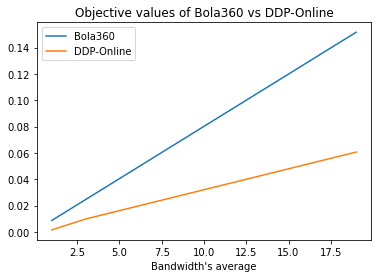

In [36]:
plt.plot(max_bands, bola_performance, label="Bola360")
plt.plot(max_bands, ddpO_performance, label="DDP-Online")
plt.legend()
plt.xlabel("Bandwidth's average")
plt.title("Objective values of Bola360 vs DDP-Online")
#plt.savefig("bandwidth_change_ratio{0}.png".format(ratio), dpi=600)
plt.show()

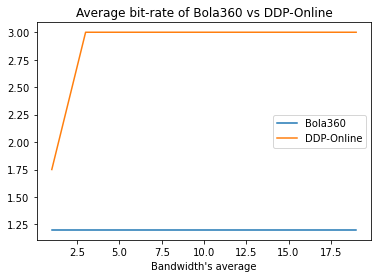

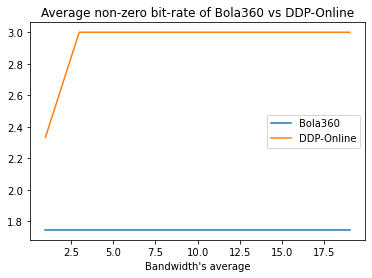

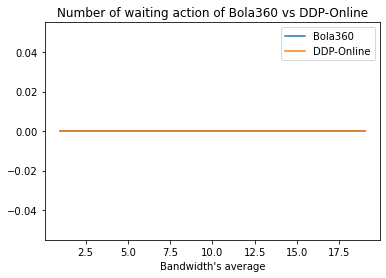

In [37]:
avg_bit_bola = []
avg_bit_ddp = []
avg_downloaded_bit_bola = []
avg_downloaded_bit_ddp = []
n_zero_bola = []
n_zero_ddp = []
for m in max_bands:
    non_zero_sols_bola = []
    n_zero = 0
    for v in bola_solutions[m]:
        if np.sum(v) > 0:
            non_zero_sols_bola.append(v)
        else:
            n_zero += 1
    avg_bit_bola.append(np.average(non_zero_sols_bola))
    n_zero_bola.append(n_zero)
    vals = []
    for sol in non_zero_sols_bola:
        for v in sol:
            if v > 0:
                vals.append(v)
    avg_downloaded_bit_bola.append(np.average(vals))

for m in max_bands:
    non_zero_sols_ddp = []
    n_zero = 0
    for v in ddp_solutions[m]:
        if np.sum(v) > 0:
            non_zero_sols_ddp.append(v)
        else:
            n_zero += 1
    n_zero_ddp.append(n_zero)
    avg_bit_ddp.append(np.average(non_zero_sols_ddp))    
    vals = []
    for sol in non_zero_sols_ddp:
        for v in sol:
            if v > 0:
                vals.append(v)
    avg_downloaded_bit_ddp.append(np.average(vals))
    
plt.plot(max_bands, avg_bit_bola, label="Bola360")
plt.plot(max_bands, avg_bit_ddp, label="DDP-Online")
plt.legend()
plt.xlabel("Bandwidth's average")
plt.title("Average bit-rate of Bola360 vs DDP-Online")
#plt.savefig("bandwidth_change_avgbit_ratio{0}.png".format(ratio), dpi=600)
plt.show()

plt.plot(max_bands, avg_downloaded_bit_bola, label="Bola360")
plt.plot(max_bands, avg_downloaded_bit_ddp, label="DDP-Online")
plt.legend()
plt.xlabel("Bandwidth's average")
plt.title("Average non-zero bit-rate of Bola360 vs DDP-Online")
#plt.savefig("bandwidth_change_avgbit_nonzero_ratio{0}.png".format(ratio), dpi=600)
plt.show()


plt.plot(max_bands, n_zero_bola, label="Bola360")
plt.plot(max_bands, n_zero_ddp, label="DDP-Online")
plt.legend()
plt.xlabel("Bandwidth's average")
plt.title("Number of waiting action of Bola360 vs DDP-Online")
#plt.savefig("bandwidth_change_nZero_ratio{0}.png".format(ratio), dpi=600)
plt.show()

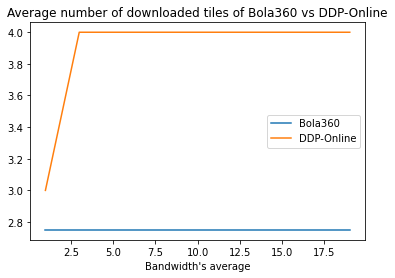

In [38]:
avg_tiles_bola = []
avg_tiles_ddp = []
for m in max_bands:
    tiles=  0
    for v in bola_solutions[m]:
        if np.sum(v) > 0:
            for t in v:
                if t > 0:
                    tiles += 1
    avg_tiles_bola.append(tiles / N)
                

for m in max_bands:
    tiles=  0
    for v in ddp_solutions[m]:
        if np.sum(v) > 0:
            for t in v:
                if t > 0:
                    tiles += 1
    avg_tiles_ddp.append(tiles / N)   
    
plt.plot(max_bands, avg_tiles_bola, label="Bola360")
plt.plot(max_bands, avg_tiles_ddp, label="DDP-Online")
plt.legend()
plt.xlabel("Bandwidth's average")
plt.title("Average number of downloaded tiles of Bola360 vs DDP-Online")
#plt.savefig("bandwidth_change_tiles_ratio{0}.png".format(ratio), dpi=600)
plt.show()

In [66]:
ddp_solutions

{0.2: [[0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1]],
 0.4: [[0, 0, 1, 2],
  [0, 0, 1, 2],
  [0, 0, 1, 2],
  [0, 0, 1, 2],
  [0, 0, 1, 2],
  [0, 0, 1, 2],
  [0, 0, 1, 2],
  [0, 0, 1, 2],
  [0, 0, 1, 2],
  [0, 0, 1, 2],
  [0, 0, 0, 2],
  [0, 0, 0, 2],
  [0, 0, 1, 2],
  [0, 1, 0, 2],
  [0, 1, 0, 2],
  [0, 1, 0, 2],
  [0, 0, 0, 2],
  [0, 0, 0, 2],
  [0, 0, 0, 2],
  [0, 0, 1, 2]],
 0.6000000000000001: [[0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2],
  [0, 0, 2, 2]],
 0.8: [

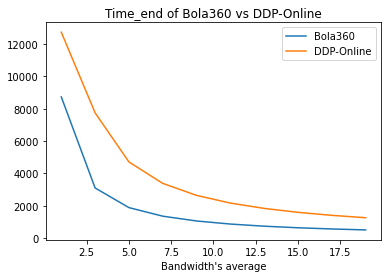

In [39]:

plt.plot(max_bands, times_bola, label="Bola360")
plt.plot(max_bands, times_ddp, label="DDP-Online")
plt.legend()
plt.xlabel("Bandwidth's average")
plt.title("Time_end of Bola360 vs DDP-Online")
#plt.savefig("bandwidth_change_TimeEnd_ratio{0}.png".format(ratio), dpi=600)
plt.show()


In [42]:
max_bands[5]

11

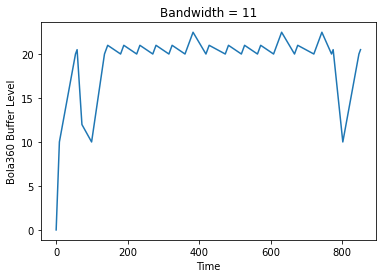

In [52]:
max_band = max_bands[5]
buffer_l_bola = buffer_levels_bola[max_band]
buffer_l_ddp = buffer_levels_ddp[max_band]
time_l_bola = time_levels_bola[max_band]
time_l_ddp = time_levels_ddp[max_band]


plt.plot(time_l_bola, buffer_l_bola, label="Bola360")
plt.xlabel("Time")
plt.ylabel("Bola360 Buffer Level")
plt.title("Bandwidth = {0}".format(max_band))
#plt.savefig("bandwidth_change_Buff_vs_time_bola_ratio{0}.png".format(ratio), dpi=600)
plt.show()

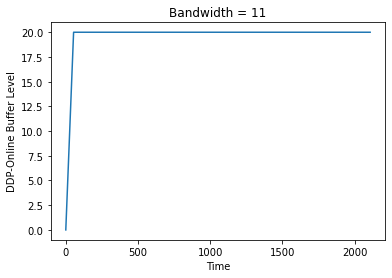

In [53]:
max_band = max_bands[5]
buffer_l_bola = buffer_levels_bola[max_band]
buffer_l_ddp = buffer_levels_ddp[max_band]
time_l_bola = time_levels_bola[max_band]
time_l_ddp = time_levels_ddp[max_band]


plt.plot(time_l_ddp, buffer_l_ddp, label="DDP-Online")
plt.xlabel("Time")
plt.ylabel("DDP-Online Buffer Level")
plt.title("Bandwidth = {0}".format(max_band))
#plt.savefig("bandwidth_change_Buff_vs_time_ddp_ratio{0}.png".format(ratio), dpi=600)
plt.show()

In [41]:
max_bands

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [9]:
mx = max_bands[24]

In [59]:
buffer_l_ddp

[0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 10]

In [18]:
time_levels_ddp[mx]

[0,
 40.82000000000243,
 81.63999999999824,
 122.45999999996111,
 163.279999999924,
 204.09999999988688,
 244.91999999984975,
 285.73999999981265,
 326.5599999997755,
 367.3799999997384,
 408.1999999997013,
 449.01999999966415,
 489.839999999627,
 530.6599999995899,
 571.4799999995528,
 612.2999999995156,
 653.1199999994785,
 693.9399999994414,
 734.7599999994043,
 775.5799999993671,
 816.39999999933,
 857.2199999992929,
 898.0399999992558,
 938.8599999992186,
 979.6799999991815,
 1020.4999999991444,
 1057.9149999998815,
 1098.7350000007725,
 1139.5550000016635,
 1180.3750000025545,
 1221.1950000034456,
 1262.0150000043366,
 1302.8350000052276,
 1343.6550000061186,
 1384.4750000070096,
 1425.2950000079006,
 1466.1150000087916,
 1506.9350000096827,
 1547.7550000105737,
 1588.5750000114647]

In [26]:
ddp_solutions[mx]

[[2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2],
 [2, 2, 2, 2]]

In [10]:
bola_solutions[mx]

[[0, 0, 3, 3],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 0, 1, 0],
 [1, 1, 1, 0],
 [0, 1, 1, 0],
 [1, 1, 0, 0],
 [0, 0, 1, 0],
 [3, 3, 3, 0],
 [0, 1, 0, 0],
 [0, 3, 0, 3],
 [0, 1, 0, 1],
 [1, 1, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 1],
 [0, 1, 1, 0],
 [1, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 0, 0],
 [0, 3, 3, 0],
 [0, 0, 1, 0],
 [0, 3, 0, 3],
 [1, 0, 0, 1],
 [1, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 3, 3],
 [0, 1, 1, 0],
 [0, 1, 1, 0],
 [0, 1, 1, 0],
 [1, 1, 0, 0],
 [0, 1, 1, 0],
 [0, 1, 0, 1],
 [1, 0, 0, 0],
 [3, 0, 0, 0],
 [0, 3, 0, 0],
 [0, 3, 3, 3],
 [1, 0, 1, 0]]

In [12]:
time_levels_bola[mx]

[0,
 20.410000000000224,
 27.21499999999887,
 34.01999999999895,
 40.82500000000243,
 51.030000000007654,
 57.835000000011135,
 64.6400000000137,
 74.84500000000442,
 81.64999999999823,
 88.45499999999204,
 91.85999999998894,
 122.4749999999611,
 125.879999999958,
 146.28999999993945,
 153.09499999993326,
 159.89999999992708,
 166.7049999999209,
 176.9099999999116,
 183.71499999990542,
 190.51999999989923,
 197.32499999989304,
 200.72999999988994,
 221.13999999987138,
 224.54499999986828,
 244.95499999984972,
 251.75999999984353,
 258.56499999983737,
 261.9699999998343,
 282.3799999998157,
 289.1849999998095,
 295.98999999980333,
 302.79499999979714,
 309.59999999979095,
 316.40499999978476,
 323.2099999997786,
 326.6149999997755,
 336.8199999997662,
 347.0249999997569,
 377.63999999972907]

In [32]:
sizes

array([ 0, 25, 50])

In [11]:
buffer_levels_bola[mx]

[0,
 10,
 13.195000000001354,
 16.390000000001272,
 19.58499999999779,
 24.37999999999257,
 27.57499999998909,
 30.769999999986524,
 35.564999999995806,
 38.760000000001995,
 41.955000000008184,
 43.55000000001128,
 27.935000000039125,
 29.53000000004222,
 19.12000000006077,
 22.31500000006696,
 25.51000000007315,
 28.705000000079337,
 33.50000000008862,
 36.69500000009481,
 39.890000000101,
 43.085000000107186,
 44.68000000011028,
 34.270000000128846,
 35.86500000013194,
 25.455000000150505,
 28.650000000156695,
 31.845000000162855,
 33.44000000016595,
 23.030000000184515,
 26.225000000190704,
 29.420000000196893,
 32.61500000020308,
 35.81000000020927,
 39.00500000021546,
 42.20000000022165,
 43.795000000224746,
 38.59000000023403,
 33.38500000024331,
 17.770000000271153]

In [ ]:
max_band = 5
min_band = 0.1
bandwidth = Bandwidth(min_band, max_band, delta=t_0 / 100, error_rate=bandwidth_error)